In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
# Load data
benin_data = pd.read_csv('../data/benin-malanville.csv')
sierra_leone_data = pd.read_csv('../data/sierraleone-bumbuna.csv')
togo_data = pd.read_csv('../data/togo-dapaong_qc.csv')

# Add location column
benin_data['location'] = 'Benin'
sierra_leone_data['location'] = 'Sierra Leone'
togo_data['location'] = 'Togo'

# Combine datasets
combined_data = pd.concat([benin_data, sierra_leone_data, togo_data], ignore_index=True)

# Preview the data
print(combined_data.head())
print(combined_data.info())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments location  
0       NaN    Benin  
1       NaN    Benin  
2       NaN    Benin  
3       NaN 

# Metric Comparison Across Countries
We'll compare the key solar potential metrics (GHI, DNI, DHI) across Benin, Sierra Leone, and Togo.

In [12]:
# Filter the data to include only positive values for the metrics
# Negative values are typically measurement errors or nighttime readings
filtered_data = combined_data[(combined_data['GHI'] > 0) & (combined_data['DNI'] > 0) & (combined_data['DHI'] > 0)]
print(f"Original data shape: {combined_data.shape}")
print(f"Filtered data shape: {filtered_data.shape}")

Original data shape: (1576800, 20)
Filtered data shape: (694430, 20)


## Boxplots for GHI, DNI, and DHI by Country

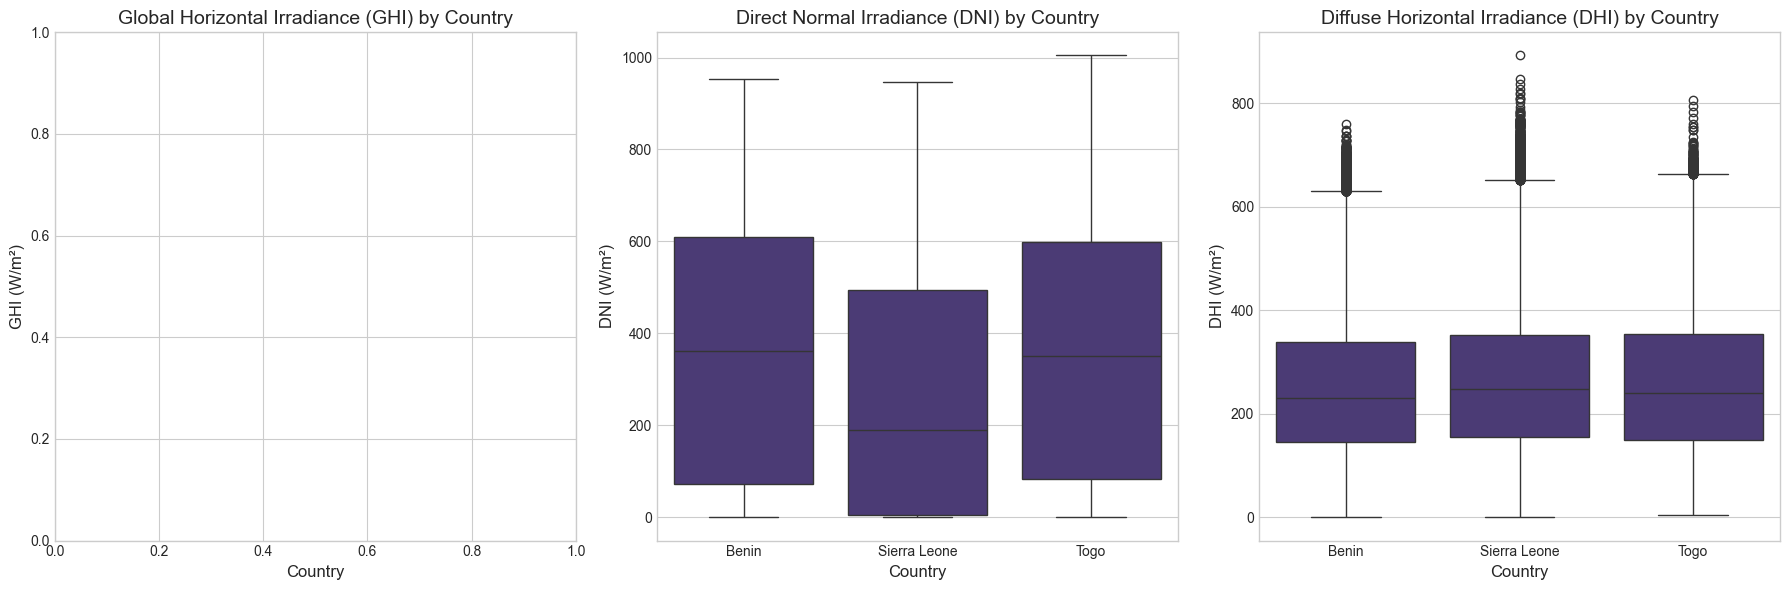

In [13]:
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# GHI Boxplot
axes[0].set_title('Global Horizontal Irradiance (GHI) by Country', fontsize=14)
axes[0].set_xlabel('Country', fontsize=12)
axes[0].set_ylabel('GHI (W/m²)', fontsize=12)

# DNI Boxplot
sns.boxplot(x='location', y='DNI', data=filtered_data, ax=axes[1])
axes[1].set_title('Direct Normal Irradiance (DNI) by Country', fontsize=14)
axes[1].set_xlabel('Country', fontsize=12)
axes[1].set_ylabel('DNI (W/m²)', fontsize=12)

# DHI Boxplot
sns.boxplot(x='location', y='DHI', data=filtered_data, ax=axes[2])
axes[2].set_title('Diffuse Horizontal Irradiance (DHI) by Country', fontsize=14)
axes[2].set_xlabel('Country', fontsize=12)
axes[2].set_ylabel('DHI (W/m²)', fontsize=12)

plt.tight_layout()
plt.show()


## Detailed Boxplots (One per Metric)

C:\Users\HP\AppData\Local\Temp\ipykernel_1304\150170200.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='GHI', data=filtered_data, palette='viridis')


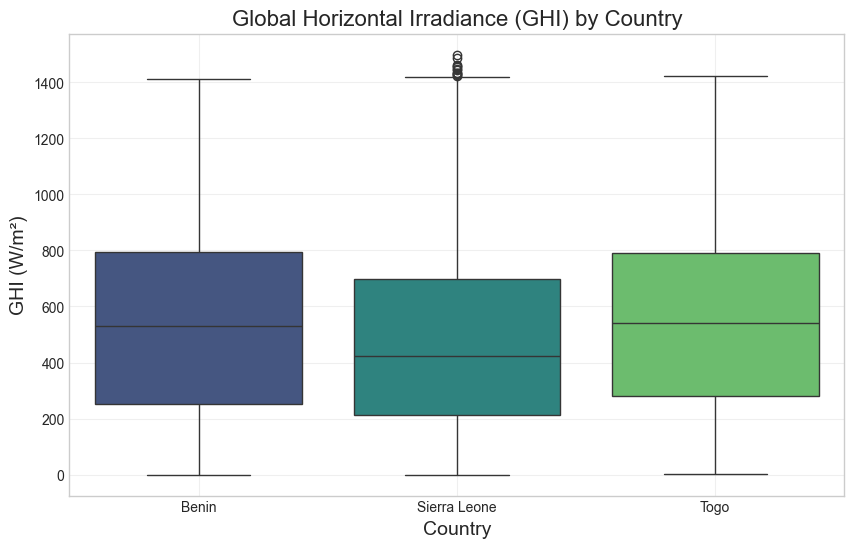

In [14]:
# Create individual boxplots for better visualization
# GHI Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='GHI', data=filtered_data, palette='viridis')
plt.title('Global Horizontal Irradiance (GHI) by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('GHI (W/m²)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1304\1262195008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='DNI', data=filtered_data, palette='viridis')


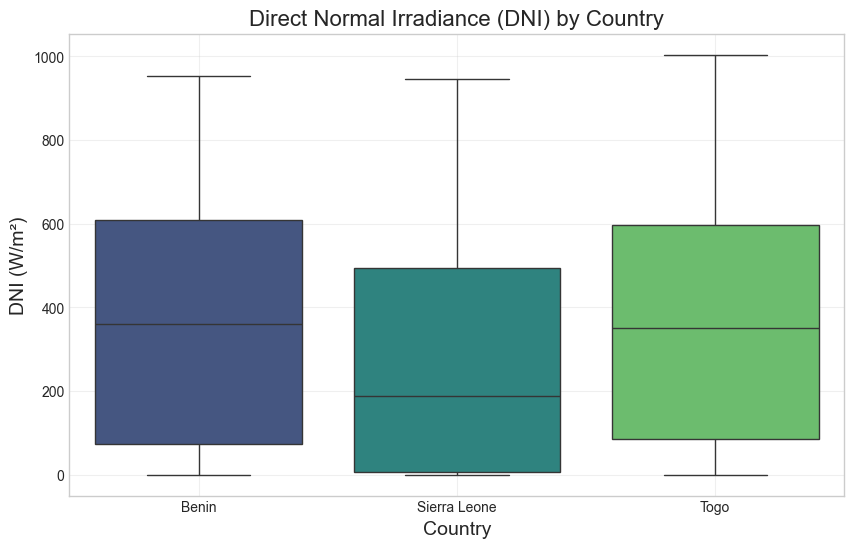

In [15]:
# DNI Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='DNI', data=filtered_data, palette='viridis')
plt.title('Direct Normal Irradiance (DNI) by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('DNI (W/m²)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1304\2631224651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='DHI', data=filtered_data, palette='viridis')


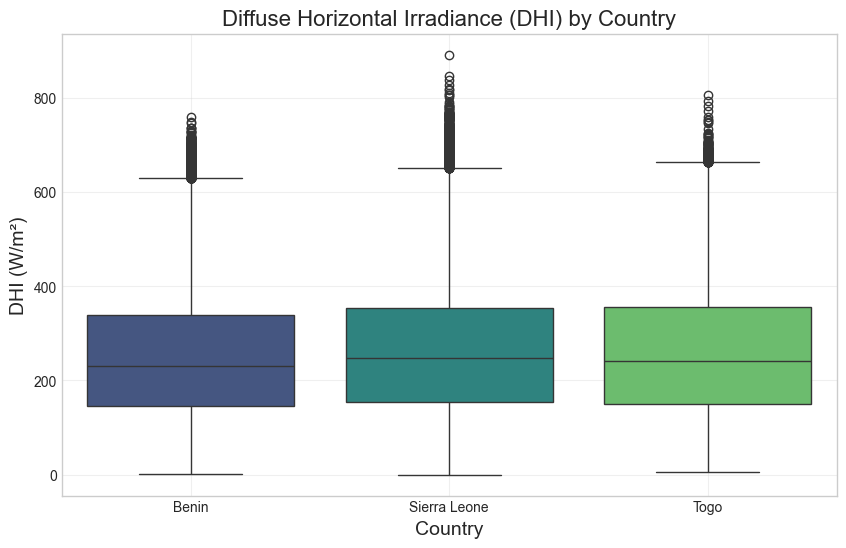

In [16]:
# DHI Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='DHI', data=filtered_data, palette='viridis')
plt.title('Diffuse Horizontal Irradiance (DHI) by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('DHI (W/m²)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

## Summary Table: Mean, Median, and Standard Deviation by Country

In [17]:
# Create summary statistics for the key metrics
summary_stats = []

# Metrics to analyze
metrics = ['GHI', 'DNI', 'DHI']

# Calculate statistics for each country and metric
for country in filtered_data['location'].unique():
    country_data = filtered_data[filtered_data['location'] == country]
    
    for metric in metrics:
        mean_val = country_data[metric].mean()
        median_val = country_data[metric].median()
        std_val = country_data[metric].std()
        
        summary_stats.append({
            'Country': country,
            'Metric': metric,
            'Mean': mean_val,
            'Median': median_val,
            'Std Dev': std_val
        })

# Create a DataFrame for the summary statistics
summary_df = pd.DataFrame(summary_stats)

# Format numeric columns to 2 decimal places
summary_df['Mean'] = summary_df['Mean'].round(2)
summary_df['Median'] = summary_df['Median'].round(2)
summary_df['Std Dev'] = summary_df['Std Dev'].round(2)

# Display the summary table
print("Summary Statistics by Country and Metric:")
print(summary_df)

Summary Statistics by Country and Metric:
        Country Metric    Mean  Median  Std Dev
0         Benin    GHI  520.69   529.1   301.44
1         Benin    DNI  362.08   360.9   278.30
2         Benin    DHI  250.51   230.3   142.20
3  Sierra Leone    GHI  459.76   422.7   289.50
4  Sierra Leone    DNI  265.67   189.2   263.25
5  Sierra Leone    DHI  258.90   248.7   138.28
6          Togo    GHI  532.45   540.9   294.13
7          Togo    DNI  360.00   351.2   273.40
8          Togo    DHI  258.12   240.8   141.13


## Relative Solar Potential Analysis
Let's analyze the relative solar potential across the three countries based on the key metrics.

In [19]:
# Calculate daily averages to better understand solar potential

# First, convert timestamp to datetime
filtered_data['Timestamp'] = pd.to_datetime(filtered_data['Timestamp'])
filtered_data['Date'] = filtered_data['Timestamp'].dt.date

# Group by date and location to get daily averages
daily_averages = filtered_data.groupby(['Date', 'location']).agg({
    'GHI': 'mean',
    'DNI': 'mean',
    'DHI': 'mean'
}).reset_index()

# Display a sample of daily averages
daily_averages.head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_1304\994802180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Timestamp'] = pd.to_datetime(filtered_data['Timestamp'])
C:\Users\HP\AppData\Local\Temp\ipykernel_1304\994802180.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = filtered_data['Timestamp'].dt.date


,Date,location,GHI,DNI,DHI
0,2021-08-09,Benin,503.107567,180.889911,350.175223
1,2021-08-10,Benin,444.004422,246.217118,235.890157
2,2021-08-11,Benin,223.552437,2.566050,220.649412
3,2021-08-12,Benin,419.374341,208.756311,279.339390
4,2021-08-13,Benin,406.890667,19.784800,385.079200
5,2021-08-14,Benin,534.010192,389.538700,228.194682
6,2021-08-15,Benin,506.632016,433.932561,197.976022
7,2021-08-16,Benin,177.450806,3.147043,173.385484
8,2021-08-17,Benin,600.167832,308.464860,330.647028
9,2021-08-18,Benin,541.192016,208.709980,343.066267


C:\Users\HP\AppData\Local\Temp\ipykernel_1304\393999303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='location', y='GHI', data=daily_averages, palette='viridis')


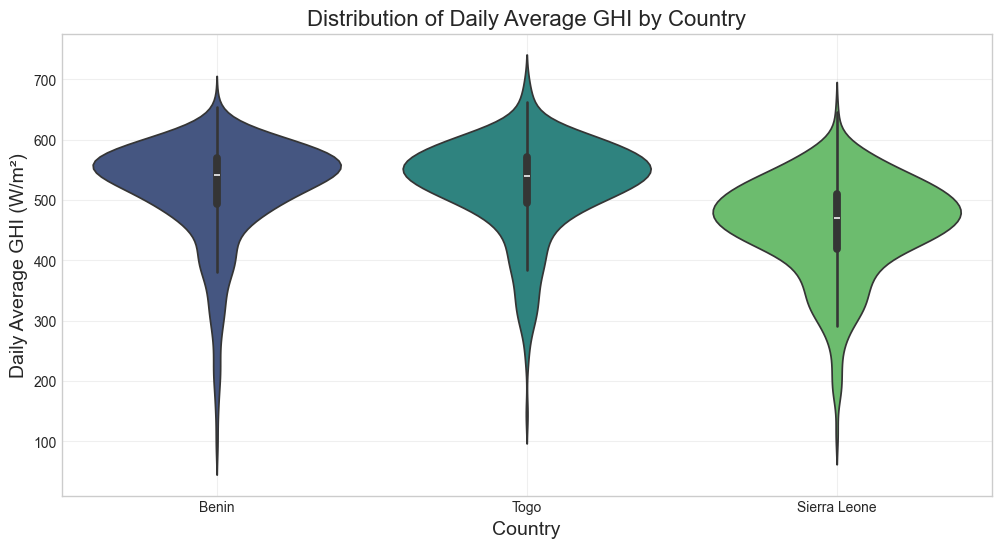

In [20]:
# Create a violin plot to visualize the distribution of daily average GHI
plt.figure(figsize=(12, 6))
sns.violinplot(x='location', y='GHI', data=daily_averages, palette='viridis')
plt.title('Distribution of Daily Average GHI by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Daily Average GHI (W/m²)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()